# 4.1 Определение энергии $\alpha$-частиц по величине их пробега в воздухе

### Бутаков Иван, Гладков Андрей; Б05-871

**Цель работы:** измерить пробег $\alpha$-частиц в воздухе двумя способами: с помощью торцевого счетчика Гейгера и сцинтилляционного счетчика и по полученным величинам определить энергию частиц.

**Оборудование:** торцевой счетчик Гейгера, сцинтилляционный счетчик, ионизационная камера.

## Теория

При $\alpha$-распаде ядро исходное родительское ядро испускает ядро гелия и превращается в дочернее ядро, число протонов и нейтронов которого уменьшается на 2 единицы. Периоды полураспада $\alpha$-активных ядер лежат в широких пределах $3 \cdot 10^{-7}$ c - $1,4 \cdot 10^{17}$ лет. Характерные энергии $\alpha$-частиц - от $4$ до $9$ МэВ. Связь между энергией $E$ частицы и периодом полураспада $T$ такова: $\lg{T}=\frac a{\sqrt{E}} + b$.

Экспериментально энергию $\alpha$-частиц удобно определять по их пробегу в веществе. Тяжелые заряженные частицы с малым зарядом $Z\sim 2$ при прохождении в веществе теряют энергию главным образом в результате неупругих соударений с атомами вещества, вызывающими ионизацию.

Для длины пробега частицы справедлива формула $\displaystyle R \sim \frac{Mv_0^4}{z^2} \sim E^2$. Для $\alpha$-частиц с энергией $4-9$ МэВ при $15^ {\circ} C, p = 10^5$ Па. выполняется $\displaystyle R = 0.32E^{\frac 32}$. Для пересчета параметров пробега от пары $(p_1, T_1)$ к паре $(p_2, T_2)$ можно использовать соображения МКТ.

## Импортирование данных

In [1]:
import pandas
import numpy as np

In [2]:
data1 = pandas.read_csv('data_I.csv', sep = ' ', header = 0, comment='#', dtype = np.float64)

x_start = 1 #cm
deltax = 0.1 #сm - погрешность х

X1 = np.array(data1['x']) + x_start
N1 = np.array(data1['N'])

## Исследование пробега $\alpha$-частиц с помощью счетчика Гейгера

### Обозначения
$x$, см. - расстояние между источником и счетчиком, $N$ - количество обнаруженных частиц за $t$ секунд.

In [3]:
data1

,x,N,t
0,0.0,433.0,29.872
1,0.5,459.0,30.234
2,1.0,494.0,30.026
3,1.5,446.0,29.916
4,2.0,430.0,30.266
5,2.5,425.0,30.263
6,3.0,418.0,30.137
7,3.5,463.0,30.332
8,4.0,451.0,31.121
9,4.5,467.0,31.579


### График 

Будем приближать участок спада функцией вида $f(x) = b e^{cx-a}$, поскольку она визуально похожа на экспоненту.

In [4]:
def exp_fun(x, a, b, c):
    return b * np.exp(c * x - a)

from scipy.optimize import curve_fit

X1_cropped = [X1[i] for i in range(len(X1)) if 8.1 < X1[i] < 12.1]
N1_cropped = [N1[i] for i in range(len(N1)) if 8.1 < X1[i] < 12.1]

optimal, _ = curve_fit(exp_fun, X1_cropped, N1_cropped)

X1_opt = np.linspace(8, 11, 50)
N1_opt = np.array([exp_fun(x, optimal[0], optimal[1], optimal[2]) for x in X1_opt])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [5]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title("Зависимость числа регистрируемых частиц от расстояния между источником и счетчиком")

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(X1, N1, xerr = deltax, yerr = 0,
          ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '')

ax.plot(X1_opt, N1_opt, lw = 1.0, label = 'Аппроксимация')
ax.plot(X1, N1, lw = 1.0, label = 'Опыт')

#hline_x = [0.0, 0.2]
#hline_y = [0.0, 0.0]
#ax.plot(hline_x, hline_y)

ax.set_xlabel('Расстояние х, см.')
ax.set_ylabel('Частиц N, шт')

ax.legend(loc='upper left')
plt.show();

<Figure size 1600x1000 with 1 Axes>

Средний пробег оценим как расстояние от точки "обрыва" $(8.25)$ см. + модуль обратного углового коэффициента в показателе экспоненты (который является характерным расстоянием, которое альфа-частица проходит в веществе):

In [6]:
print('Модуль обратного углового коэффициента: %.1f см.' %(-optimal[2]))
R1_mean = 8.25 - 1 / optimal[2]
print('Средний пробег равен %.1f см.' %(R1_mean))

Модуль обратного углового коэффициента: 1.1 см.
Средний пробег равен 9.1 см.


Экстраполированный пробег, как следует из продолжения зеленого прямолинейного участка от $[8.5;  9.5]$ см. до пересениния с горизонталью, равен $10.1$ см. Этот отрезок наиболее подходит под соответствующую касательную из лабника.

У нас не получилось ожидаемого графика с точкой перегиба. Тем не менее, если бы она была, то, как следует из нашего рисунка, она находилась бы в промежутке $[7.5; 10.5]$ см. В качестве оценки погрешности среднего пробега возьмём расстояние от нашей точки до правой границы, то есть $10.5 - 9.1 \approx 1.4$ см.

Погрешность экстраполированного пробега складывается из неточности определения искомой касательной и неточности определняи точки пересения с осью абсцисс. Оценим эту величину как $0.5$ см.

Итого, $R_{ср1} = 9.1 \pm 1.4$ cм, $R_{э1} = 10.2 \pm 0.5$ см.

Пересчитаем пробег в г/$см^2$ по формуле $R' = \rho R$, где $\rho$ - плотность среды (воздуха).

In [7]:
rho = 1.29e-3
print('R_1ср = %.3f ± %.3f г/см^2.' %(rho * 9.1, rho * 1.4))
print('R_1э = %.4f ± %.4f г/см^2.' %(rho * 10.2, rho * 0.2))

R_1ср = 0.012 ± 0.002 г/см^2.
R_1э = 0.0132 ± 0.0003 г/см^2.


## Исследование пробега $\alpha$-частиц с помощью сцинтилляционного счетчика

### Импортирование данных

In [8]:
data2 = pandas.read_csv('data_II.csv', sep = ' ', header = 0, comment='#', dtype = np.float64)
deltaP = 1 #в торах

Измерили барометром атмосферное давление:

In [9]:
P_0 = 100600 #Па

### Обозначения

$P$ - давление в торах, $N$ - количество обнаруженных частиц за 10 секунд.

In [10]:
data2

,P,N
0,745.0,3858.0
1,745.0,3753.0
2,745.0,3814.0
3,740.0,3804.0
4,740.0,3755.0
...,...,...
79,445.0,11.0
80,445.0,8.0
81,440.0,4.0
82,440.0,3.0


### График 

In [11]:
data2_m = data2.groupby(['P']).mean().reset_index()

P2 = np.array(data2_m['P'])
P2 = P2 * P_0 / (0.76 * 9.8 * 13600) #пересчет на наше атмосферное давление
P2 = max(P2) - P2
N2 = np.array(data2_m['N'])

P2 = np.delete(P2, len(P2) - 1)
N2 = np.delete(N2, len(N2) - 1)

In [12]:
dP2 = P2
dN2 = N2

dP2 = np.delete(dP2, 0)
dN2 = np.delete(dN2, 0)
dP2 = np.append(dP2, 0)
dN2 = np.append(dN2, 0)

dN2dP2 = np.zeros(len(P2))

for i in range(len(P2)):
    dN2dP2[i] = (N2[i] - dN2[i]) / (P2[i] - dP2[i])
dN2dP2 = np.delete(dN2dP2, len(dP2) - 1)
dN2dP2 *= -100
P2_ = np.delete(P2, len(P2) - 1)

dN2dP2_f = np.polyfit(P2_, dN2dP2, 10)
sp2 = np.linspace(19, 270, 100)
Y2 = [np.polyval(dN2dP2_f, i) for i in sp2]

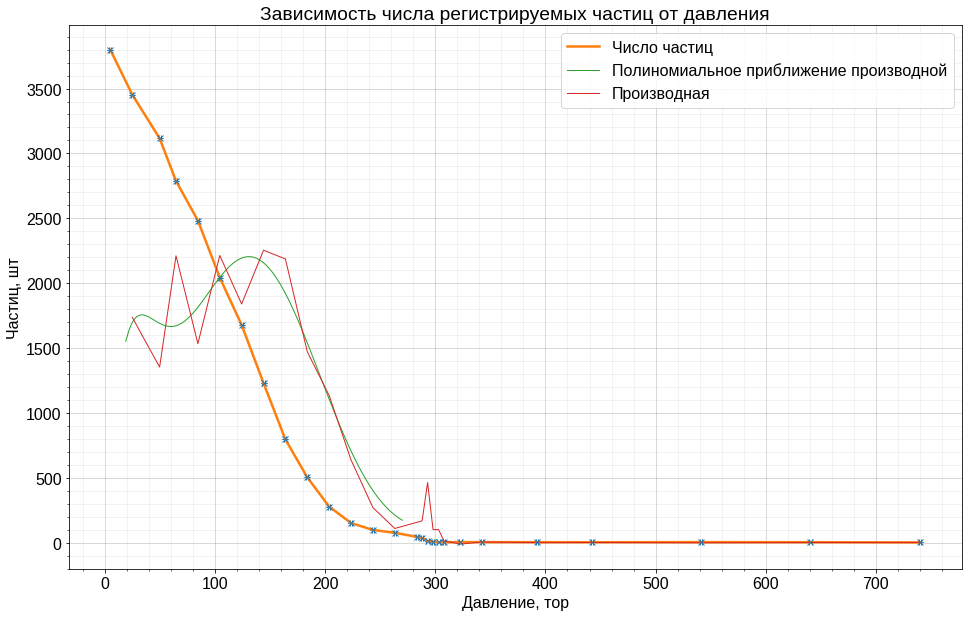

In [13]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title("Зависимость числа регистрируемых частиц от давления")

fig.set_figheight(10)
fig.set_figwidth(16)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(P2, N2, xerr = deltaP, yerr = 0,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3)

ax.plot(P2, N2, lw = 2.5, label = 'Число частиц')
ax.plot(sp2, Y2, lw = 1.0, label = 'Полиномиальное приближение производной')
ax.plot(P2_, dN2dP2, lw = 1.0, label = 'Производная')

#hline_x = [0.0, 0.2]
#hline_y = [0.0, 0.0]
#ax.plot(hline_x, hline_y)

ax.set_xlabel('Давление, тор')
ax.set_ylabel('Частиц, шт')

ax.legend(loc='upper right')
plt.show();

Точка перегиба имеет координату $130 \pm 5$ тор, $2200 \pm 20$ частиц. Это соответствует длине среднего пробега $9$ см. - расстоянию между препаратом и люминофором.

Точка $220 \pm 10$ тор, $180 \pm 10$ частиц соответствует величине экстраполированного пробега $9$ см.

Для величины пробега пользуемся соотношением $\lambda = \frac{1}{\sqrt 2 n \pi r^2}$, где $r$ - радиус альфа-частицы, $n$ - концентрация частиц воздуха. При этом $n = \frac p{kT}$, $k$ - постоянная Больцмана, $T$ - температура, и $\lambda = \frac{kT}{\sqrt 2 p \pi r^2}$. Тогда $R_0 = \frac {Rp}{p_0}$. Пересчет точек на $15^{\circ}C$ даёт 

In [14]:
p2_1 = 130
dp2_1 = 5
p2_2 = 220
dp2_2 = 10
r2 = 9 #см - расстояние от препарата до прибора

print('R_2ср = %.2f ± %.2f см. - средний пробег.' %(r2 * p2_1 / 760, r2 * dp2_1 / 760))
print('R_2э = %.2f ± %.2f см. - экстраполированный пробег.' %(r2 * p2_2 / 760, r2 * dp2_2 / 760 ))

print('R_2ср = %.4f ± %.4f г/см^2. - средний пробег.' %(rho * r2 * p2_1 / 760, rho * r2 * dp2_1 / 760))
print('R_2э = %.4f ± %.4f г/см^2. - экстраполированный пробег.' %(rho * r2 * p2_2/ 760, rho * r2 * dp2_2 / 760))

R_2ср = 1.54 ± 0.06 см. - средний пробег.
R_2э = 2.61 ± 0.12 см. - экстраполированный пробег.
R_2ср = 0.0020 ± 0.0001 г/см^2. - средний пробег.
R_2э = 0.0034 ± 0.0002 г/см^2. - экстраполированный пробег.


Напомним, что в первом опыте получились более длинные пробеги $R_{1ср} = 0.012 \pm 0.002$ г/см^2, $R_{1э} = 0.0132 \pm 0.0003$ г/см^2.

Пусть $d$ - толщина слюды. Тогда, учитывая, что пробег альфа-частиц в слюде в $1.2$ раза больше аналогичного пробега в воздухе, получим уравнение $R_1 - R_2 = 1.2d(\rho_{cлюда} - \rho_{возд})$, или $d = \frac {R_1 - R_2}{1.2(\rho_{cлюда} - \rho_{возд})}$. Для ответа в г/см^2 нужна формула $d = \rho_{cлюда}\frac {R_1 - R_2}{1.2(\rho_{cлюда} - \rho_{возд})}$.

In [15]:
rho2 = 2.77
print('Толщина слюды равна %.2f ± %.2f мг/см^2.' %(1000 * rho2 * (0.012 - 0.002) / (1.2 * (rho2 - rho)), 1000 * rho2 * (0.002) / (1.2 * (rho2 - rho))))

Толщина слюды равна 8.34 ± 1.67 мг/см^2.


Определим энергию альфа-частиц по формуле $E = (\frac R{0.32})^{\frac 23}$, $\delta E = (0.32)^{-\frac 23} \cdot \frac 23 \frac {\delta R}{R^{\frac 13}}$.

In [16]:
E2 = (2.61 / 0.32) ** (2 / 3)
print('Энергия альфа-частиц равна %.2f ± %.2f МэВ.' %(E2, 0.32**(-2/3) * 2/3 * 0.12 / 2.61**(1/3)))

Энергия альфа-частиц равна 4.05 ± 0.12 МэВ.


Полученный результат отличается от эталонного $5.15$ МэВ на $25\%$.

Оценим количество вещества в препарате по известному периоду полураспада, считая эффективность счёта альфа-частиц абсолютной. Телесный угол, под которым виден источник, составляет $\Omega = 0.04$ ср.

Если $N(t)$ - количество нераспавшихся частиц через время $t$ от момента создания вещества, то справедливо $N = N_0\; 2^{-\frac tT}$. $T$ - период полураспада, $N_0$ - исходное числоч частиц. $N_t' = =-\frac 1T N_0 \ln 2 2^{-\frac tT}$. Полагая $t << T$, имеем $2^{-\frac tT} \approx 1 \Longrightarrow N_t' =-\frac 1T N_0 \ln 2$. Полагая $\Delta t = 1$ c и $\Delta N = -380$ (такое число частиц испускается при нулевом давлении за $1$ с), имеем $\frac {\Omega}{4\pi}\Delta N = -\Delta t \frac 1T N_0 \ln 2$, или $N_0 = -\frac {\Omega}{4\pi\ln 2 \Delta t}\Delta N T$.

In [17]:
print('Всего частиц в веществе %.f.' %(0.04 * 380 * 2.44e4 * 365.25 * 24 * 3600 / (4 * np.pi * np.log(2) * 1)))

Всего частиц в веществе 1343699192895.


Иными словами, $1.3 \cdot 10^{12} частиц \approx 2 \cdot 10^{-12}$ моль.

## Исследование пробега $\alpha$-частиц с помощью ионизационной камеры

In [18]:
data3 = pandas.read_csv('data_III.csv', sep = ' ', header = 0, comment='#', dtype = np.float64)
P3 = np.array(data3['P'])
P3 = P3 * P_0 / (0.76 * 9.8 * 13600) #пересчет на наше атмосферное давление
P3 = max(P3) - P3
I3 = np.array(data3['I'])

P3_cropped = [P3[i] for i in range(len(P3)) if 250 < P3[i] < 570]
I3_cropped = [I3[i] for i in range(len(I3)) if 250 < P3[i] < 570]

P3_cropped1 = [P3[i] for i in range(len(P3)) if 570 < P3[i]]
I3_cropped1 = [I3[i] for i in range(len(I3)) if 570 < P3[i]]

P3_opt = np.linspace(250, 590, 100)
I3_coeffs = np.polyfit(P3_cropped, I3_cropped, 1)
I3_opt = [np.polyval(I3_coeffs, i) for i in P3_opt]

P3_opt1 = np.linspace(550, 740, 100)
I3_coeffs1 = np.polyfit(P3_cropped1, I3_cropped1, 1)
I3_opt1 = [np.polyval(I3_coeffs1, i) for i in P3_opt1]

$P$ выражено в торах, $I$ - в пикоамперах.

In [19]:
data3

,P,I
0,745.0,5.0
1,735.0,26.0
2,720.0,46.0
3,710.0,63.0
4,705.0,70.0
...,...,...
82,50.0,999.0
83,30.0,998.0
84,20.0,994.0
85,10.0,990.0


### График 

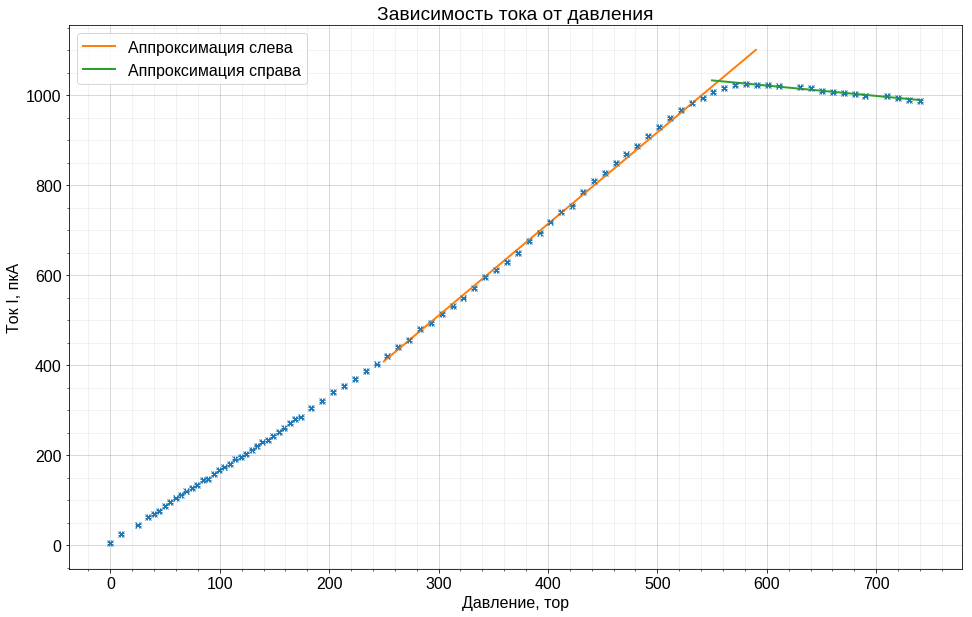

In [20]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title("Зависимость тока от давления")

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(P3, I3, xerr = deltaP, yerr = 2,
           ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3)

#ax.plot(P3, I3, lw = 1.0)
ax.plot(P3_opt, I3_opt, lw = 2.0, label = 'Аппроксимация слева')
ax.plot(P3_opt1, I3_opt1, lw = 2.0, label = 'Аппроксимация справа')

#hline_x = [0.0, 0.2]
#hline_y = [0.0, 0.0]
#ax.plot(hline_x, hline_y)

ax.set_xlabel('Давление, тор')
ax.set_ylabel('Ток I, пкА')

ax.legend(loc='upper left')
plt.show();

Из графика видно, что $P_0 = 555 \pm 5$ бар. Пользуемся $R_0 = \frac {Rp}{p_0}$:

In [21]:
r3 = 10
p3 = 555
dp3 = 5
print('R_3э = %.2f ± %.2f см. - экстраполированный пробег.' %(r3 * p3 / 760, r3 * dp3 / 760 ))
print('R_3э = %.4f ± %.4f г/см^2. - экстраполированный пробег.' %(rho * r3 * p3/ 760, rho * r3 * dp3 / 760))

R_3э = 7.30 ± 0.07 см. - экстраполированный пробег.
R_3э = 0.0094 ± 0.0001 г/см^2. - экстраполированный пробег.


In [22]:
E3 = (7.3 / 0.32) ** (2 / 3)
print('Энергия альфа-частиц равна %.2f ± %.2f МэВ.' %(E3, 0.32**(-2/3) * 2/3 * 0.07 / 7.3**(1/3)))

Энергия альфа-частиц равна 8.04 ± 0.05 МэВ.


На $75\%$ отличается от табличного значения.

По этому результату оценим, бумажный листок какой толщины не пропустит такую альфа-частицу. В таблице $V.3$ обнаруживаем, что для частиц с энергией $8$ МэВ. Пробег в $Al$ в биологической составляет ткани - $78.0$ мкм. Лист бумаги по механическим свойствам похож на биологическую ткань, но более жесктий. Потому можно утверждать, что лист толщиной $78.0$ мкм выдержит испытание альфа-частицами из нашего опыта.

# Сопоставление результатов

Были получены следующие результаты:
 - $R_{ср1} = 9.1 \pm 1.4$ cм, $R_{э1} = 10.2 \pm 0.5$ см, $R_{1ср} = 0.012 \pm 0.002$ г/см^2, $R_{1э} = 0.0132 \pm 0.0003$ г/см^2.
 
 - $R_{2ср} = 1.54 \pm 0.06$ см. - средний пробег, $R_{2э} = 2.61 \pm 0.12$ см. - экстраполированный пробег, $R_{2ср} = 0.0020 \pm 0.0001$ г/см^2. - средний пробег, $R_{2э} = 0.0034 \pm 0.0002$ г/см^2. - экстраполированный пробег.
 
 - $R_{3э} = 7.30 \pm 0.07$ см. - экстраполированный пробег, $R_{3э} = 0.0094 \pm 0.0001$ г/см^2. - экстраполированный пробег.
 
Первые два результата различаются из-за наличия в первом случае слоя слюды. Второй и третий отличаются в $3$ раза.

Первый метод представляется неточным в силу того, что там не был получен график с хорошо выраженной тчокой перегиба. 

Третий метод представляется наиболее достоверным, поскольку для него измерено много точек, которые хорошо ложатся на прямые, не то что во втором методе какая-то прыгающая производная. Тем не менее, результаты по энергии более близкие к истине даёт второй метод.

# Выводы

1. Тремя способами измерена длина пробега альфа-частиц в воздухе, результаты в разделе выше.
2. Двумя способами определены энергии вылетающих частиц - $4.05 \pm 0.12$ МэВ, $8.04 \pm 0.05$ МэВ.
3. Вычислена толщина слюды, находящаяся в приборе из первого опыта $8.34 \pm 1.67 \frac {мг}{см^2}$.
4. Оценено количество вещества во втором опыте $\approx 2 \cdot 10^{-12}$ моль.
5. Построены графики $N(x), \; N(P), \; I(P)$.